### 图像金字塔
#### pyrup() -----由上向下构建金字塔
#### pyrdown()  -----由下向上构建金字塔

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. **向下采样**


In [4]:
# 底层图像
img=cv2.imread("../resources/result/DJI_0020_sharpen.png")[:1200,:,:][...,::-1]
print(img.shape)
#第一层图像
downsample_img1=cv2.pyrDown(img)
#第二层图像
downsample_img2=cv2.pyrDown(downsample_img1)
#第三层图像
downsample_img3=cv2.pyrDown(downsample_img2)
#第四层图像
downsample_img4=cv2.pyrDown(downsample_img3)
#第五层图像
downsample_img5=cv2.pyrDown(downsample_img4)


(1200, 1600, 3)


(<matplotlib.axes._subplots.AxesSubplot at 0x23d1ed414c0>,
 Text(0.5, 1.0, '第六层'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s

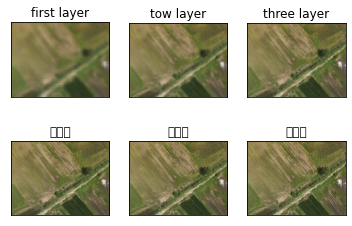

In [5]:
plt.subplot(231),plt.imshow(downsample_img5),plt.title('first layer'),plt.xticks([]),plt.yticks([])
plt.subplot(232),plt.imshow(downsample_img4),plt.title('tow layer'),plt.xticks([]),plt.yticks([])
plt.subplot(233),plt.imshow(downsample_img3),plt.title('three layer'),plt.xticks([]),plt.yticks([])
plt.subplot(234),plt.imshow(downsample_img2),plt.title('第四层'),plt.xticks([]),plt.yticks([])
plt.subplot(235),plt.imshow(downsample_img1),plt.title('第五层'),plt.xticks([]),plt.yticks([])
plt.subplot(236),plt.imshow(img),plt.title('第六层'),plt.xticks([]),plt.yticks([])

2. **向上采样**

(1200, 1600, 3)
(1200, 1600, 3)


(<matplotlib.axes._subplots.AxesSubplot at 0x23d1e62b580>,
 Text(0.5, 1.0, 'oringe-img'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

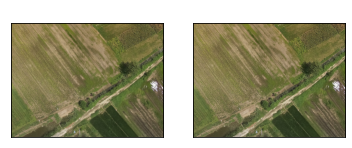

In [6]:
upsample_img3=cv2.pyrUp(downsample_img4)
upsample_img2=cv2.pyrUp(downsample_img3)
upsample_img1=cv2.pyrUp(downsample_img2)
upsample_img=cv2.pyrUp(downsample_img1)

print(upsample_img.shape)
print(img.shape)

plt.subplot(121),plt.imshow(upsample_img),plt.title('down-up',color='w'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img),plt.title('oringe-img',color='w'),plt.xticks([]),plt.yticks([])

In [7]:
cv2.imshow("up",upsample_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

3. **laplacian 金字塔**
Li=Gi-pyrUp(i+1)

(<matplotlib.axes._subplots.AxesSubplot at 0x23d1e9043a0>,
 Text(0.5, 1.0, '第四层'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 22235 missing from current font.
  font.set_text(s, 0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 23618 missing from current font.
  font.set_text(s, 0,

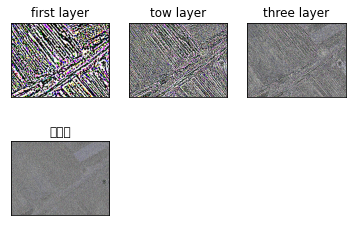

In [8]:
laplacian_img3=downsample_img3-upsample_img3
laplacian_img2=downsample_img2-cv2.pyrUp(downsample_img3)
laplacian_img1=downsample_img1-cv2.pyrUp(downsample_img2)
laplacian_img=img-cv2.pyrUp(downsample_img1)

plt.subplot(231),plt.imshow(laplacian_img3),plt.title('first layer'),plt.xticks([]),plt.yticks([])
plt.subplot(232),plt.imshow(laplacian_img2),plt.title('tow layer'),plt.xticks([]),plt.yticks([])
plt.subplot(233),plt.imshow(laplacian_img1),plt.title('three layer'),plt.xticks([]),plt.yticks([])
plt.subplot(234),plt.imshow(laplacian_img),plt.title('第四层'),plt.xticks([]),plt.yticks([])

In [12]:
cv2.imshow("laplacian",laplacian_img3)
cv2.waitKey(0)
cv2.destroyAllWindows()


4. **图像金字塔用于图像融合**

In [14]:
import numpy as np
apple=cv2.imread(r'E:\pythonProject\opencvProject\resources\result\apple_sharpen.jpg')
orange=cv2.imread(r'E:\pythonProject\opencvProject\resources\result\orange_sharpen.jpg')

apple=cv2.GaussianBlur(apple,(3,3),0)
orange=cv2.GaussianBlur(orange,(3,3),0)

# 获取高斯金字塔
G1=apple.copy()
GA=[G1]
G2=orange.copy()
GB=[G2]

# 获取五层金字塔
layer=3

for i in range(layer):
    G1=cv2.pyrDown(G1)
    G2=cv2.pyrDown(G2)
    GA.append(G1)
    GB.append(G2)

In [25]:
# 获取两幅图像的laplace金字塔（4）
LA=[GA[-1]]
LB=[GB[-1]]
for i in range(layer,0,-1):
    # li=Gi-Gi+1*gx
    la=np.subtract(GA[i-1],cv2.pyrUp(GA[i]))
    lb=np.subtract(GB[i-1],cv2.pyrUp(GB[i]))
    LA.append(la)
    LB.append(lb)


4 4


In [33]:
#图像融合
print(len(LA),len(LB))
LS=[]
for la,lb in zip(LA,LB):
    row,cols,dims=la.shape
    ls=np.hstack((la[:,0:int(cols/2)],lb[:,int(cols/2):]))
    LS.append(ls)

ls_=LS[0]
for i in range(1,4):
    ls_=cv2.pyrUp(ls_)
    ls_=np.add(ls_,LS[i])


4 4


In [35]:
cv2.imshow("laplacian",ls_)
cv2.waitKey(0)
cv2.destroyAllWindows()

直接融合实例


In [22]:
rows,cols,dims=apple.shape
real=np.hstack((apple[:,:int(cols/2)],orange[:,int(cols/2):]))


(<matplotlib.axes._subplots.AxesSubplot at 0x21c0fd5af10>,
 Text(0.5, 1.0, '1'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

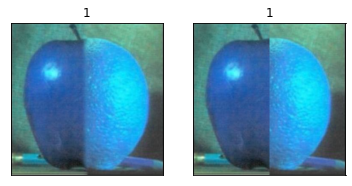

In [24]:
plt.subplot(121),plt.imshow(ls),plt.title('1'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(real),plt.title('1'),plt.xticks([]),plt.yticks([])